# MARK SILAS

# Exploratory Data Analysis

In [556]:
#importing necessary libray for data analysis and visualisation
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [557]:
#Reading the csv data file
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [558]:
print('Data shape:',data.shape)

Data shape: (3333, 11)


In [559]:
#viewing columns of data
data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [560]:
#Viewing the summary descriptive statistics
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [561]:
#Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [563]:
#Cheking for total missing values
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [564]:
#Checking for duplicate values
data.duplicated().sum()

0

In [565]:
#Value counts for churn column
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

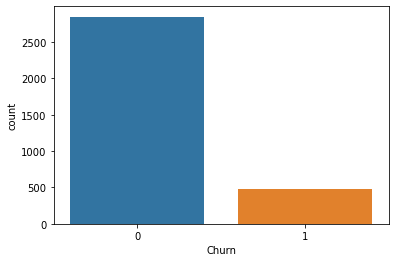

In [566]:
#Visualising the target variable(Churn)
ax = sns.countplot(x="Churn", data=data)

__There is an observable imbalance in the binary class dsitribution of our label.__

__The 0 class represents 86% of the total class while the 1 class represents 14% of the total class.__

__This imbalance is likely to create a bias in our model.__

__The challenge will subsequently be handled using the SMOTE technique for data augmentation.__

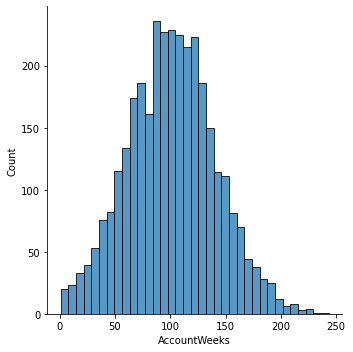

In [567]:
#Visualising AccountWeeks column
sns.displot(data=data, x="AccountWeeks")

In [568]:
#Value count for Contract renewal
data['ContractRenewal'].value_counts()

1    3010
0     323
Name: ContractRenewal, dtype: int64

In [569]:
#Value counts for DataPlan column
data['DataPlan'].value_counts()

0    2411
1     922
Name: DataPlan, dtype: int64

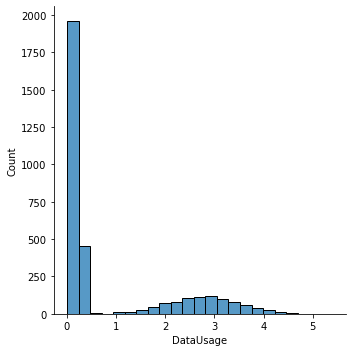

In [570]:
#Visualising DataUSage column
sns.displot(data=data, x="DataUsage")

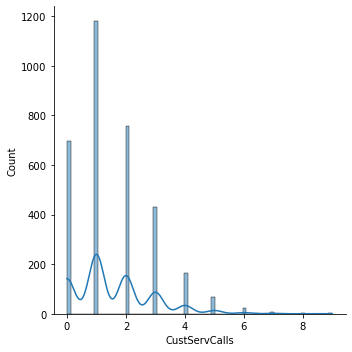

In [571]:
#Visualising CustServCalls column
sns.displot(data=data, x="CustServCalls", kde=True)

In [572]:
#Value counts for DayMins
pd.qcut(data['DayMins'],5).value_counts()

(165.68, 194.0]     668
(224.76, 350.8]     667
(-0.001, 134.74]    667
(134.74, 165.68]    666
(194.0, 224.76]     665
Name: DayMins, dtype: int64

In [573]:
#Value counts for DayCalls
pd.qcut(data['DayCalls'],5).value_counts()

(-0.001, 84.0]    699
(84.0, 96.0]      695
(96.0, 106.0]     662
(117.0, 165.0]    649
(106.0, 117.0]    628
Name: DayCalls, dtype: int64

In [574]:
#Value count for MonthlyCharge
pd.qcut(data['MonthlyCharge'],5).value_counts()

(42.2, 50.0]      706
(57.02, 70.0]     673
(13.999, 42.2]    668
(70.0, 111.3]     660
(50.0, 57.02]     626
Name: MonthlyCharge, dtype: int64

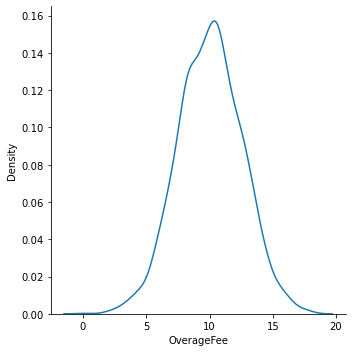

In [575]:
#Visualising OverageFee column
sns.displot(data=data, x="OverageFee", kind="kde")

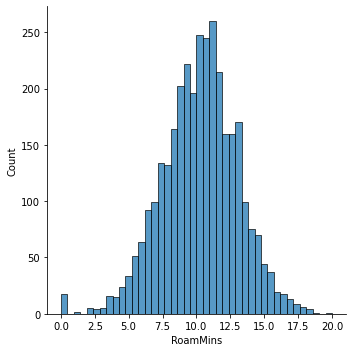

In [576]:
#Visualising RoamMins column
sns.displot(data=data, x="RoamMins")

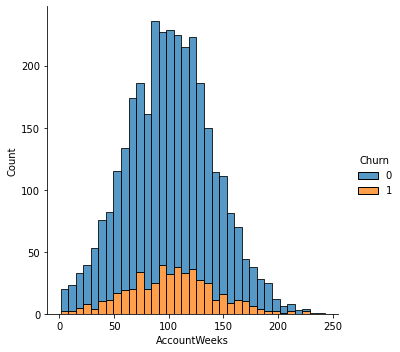

In [577]:
#Visualisation for Churn w.r.t AccountWeeks
sns.displot(data=data, x="AccountWeeks", hue="Churn", multiple="stack")

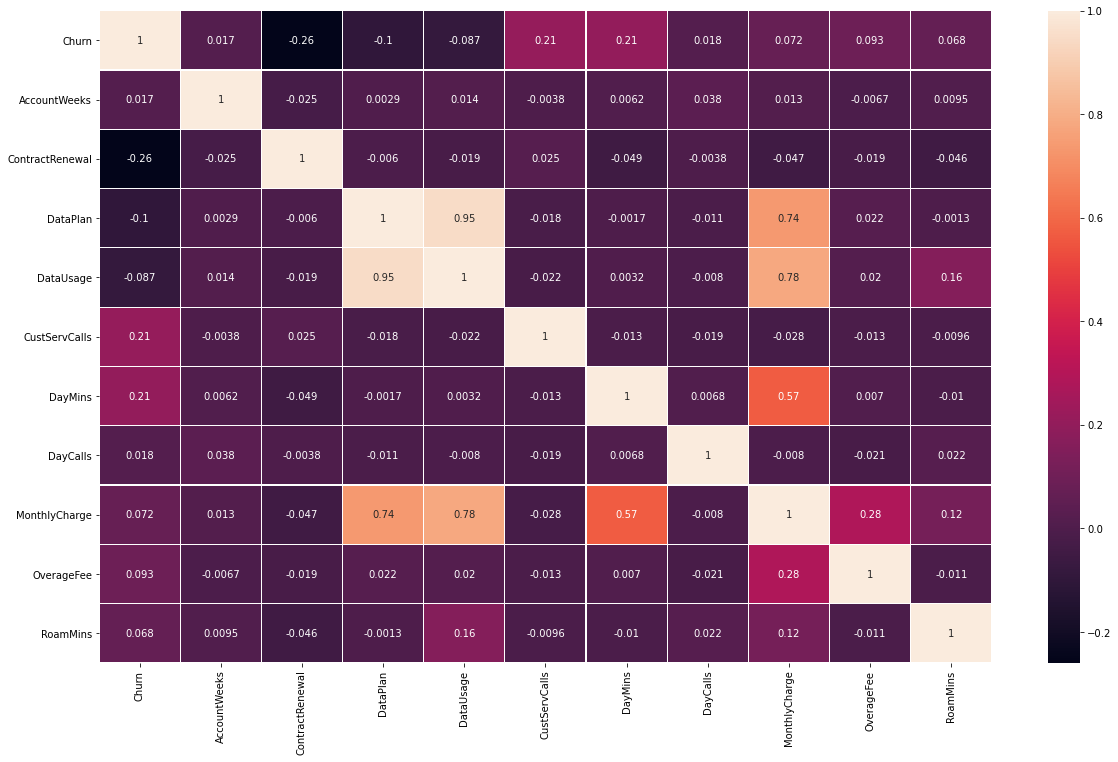

In [578]:
#checking the correlation between features
sns.heatmap(data.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [579]:
#Applying Z-score to find unusual data point values such as outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [580]:
#Checking for outliers(outliers always have z-scores  above 3)
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

414

In [581]:
#Removing Outliers
Data = data[(z < 3).all(axis=1)]
Data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...
3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


In [582]:
#Instantiating a threadpool to handle accuracy score and classification report
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import classification_report, confusion_matrix

def model_testing(md):
    with ThreadPoolExecutor(max_workers=2) as executor:
        executor.submit(md.fit, X_train, y_train)
    print("Training Accuracy: ", md.score(X_train, y_train), '\n')
    print("Testing Accuracy: ", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(data.drop(columns=['Churn']))

# MACHINE LEARNING MODEL

# Applying Various Classification Model

In [583]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#Setting your columns into attributes and label
X = Data[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']]
y = Data['Churn']

In [584]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_sc = scaler.transform(X)
X_sc''' 

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler().fit(X)\nX_sc = scaler.transform(X)\nX_sc'

In [585]:
#Importing training and testsing, standadisation and pipeline module 
from sklearn.model_selection import train_test_split, cross_validate
#from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Instantiating the object of the models 
dct= tree.DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42).fit(X_train, y_train)
rfc = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
gbc = GradientBoostingClassifier().fit(X_train, y_train)

In [586]:
print('X_train shape:', X_train.shape, '\nX_test shape:', X_test.shape, '\ny_test shape:', y_test.shape, '\ny_train shape:', y_train.shape)

X_train shape: (2335, 10) 
X_test shape: (584, 10) 
y_test shape: (584,) 
y_train shape: (2335,)


In [587]:
def trainer(X_train, y_train,):
    classifiers = [dct, rfc, gbc]
    for classifier in classifiers:
        metrics = model_testing(classifier)
        print(metrics)
        print(classifier)

trainer(X_train, y_train)

Training Accuracy:  0.9481798715203427 

Testing Accuracy:  0.9417808219178082 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       527
           1       0.76      0.60      0.67        57

    accuracy                           0.94       584
   macro avg       0.86      0.79      0.82       584
weighted avg       0.94      0.94      0.94       584

[0 0 0 ... 0 0 1]
DecisionTreeClassifier(max_depth=4, random_state=42)
Training Accuracy:  1.0 

Testing Accuracy:  0.946917808219178 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       527
           1       0.82      0.58      0.68        57

    accuracy                           0.95       584
   macro avg       0.89      0.78      0.83       584
weighted avg       0.94      0.95      0.94       584

[0 0 0 ... 0 0 0]
RandomForestClassifier(n_estimators=200)
Training Accuracy:  0.9734475374732334 

Testing Accuracy:  0.95205479

 # Using SMOTE Algorithm to handle Imbalance

__Running the example to first create the dataset and summarize the class distribution with a ratio 1:100__

In [588]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = make_classification(n_samples=10000, n_features=10, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [589]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


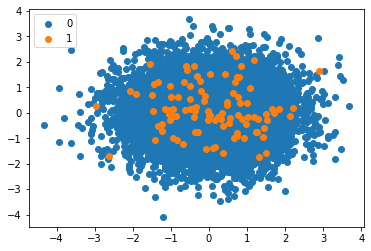

In [590]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

__Applying the SMOTE to transform the dataset.__

__This will now show a balanced distribution with 9,900 examples in the minority class.__

In [591]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = make_classification(n_samples=10000, n_features=10, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)


Counter({0: 9900, 1: 100})


In [592]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


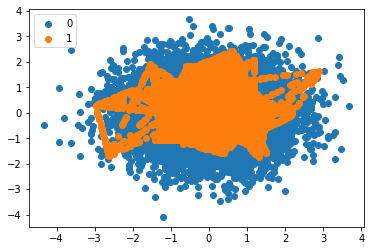

In [593]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

__Retraining our model with the new balanced dataset.__

In [594]:
#Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Instantiating the object of the models 
dct= tree.DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=42).fit(X_train, y_train)
rfc = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=8, criterion='friedman_mse').fit(X_train, y_train)

In [595]:
def trainer(X_train, y_train,):
    classifiers = [dct, rfc, gbc]
    for classifier in classifiers:
        metrics = model_testing(classifier)
        print(metrics)
        print(classifier)
trainer(X_train, y_train)

Training Accuracy:  0.9910353535353535 

Testing Accuracy:  0.9747474747474747 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2003
           1       0.97      0.98      0.97      1957

    accuracy                           0.97      3960
   macro avg       0.97      0.97      0.97      3960
weighted avg       0.97      0.97      0.97      3960

[0 0 0 ... 0 0 0]
DecisionTreeClassifier(max_depth=10, random_state=42)
Training Accuracy:  1.0 

Testing Accuracy:  0.9954545454545455 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2003
           1       0.99      1.00      1.00      1957

    accuracy                           1.00      3960
   macro avg       1.00      1.00      1.00      3960
weighted avg       1.00      1.00      1.00      3960

[0 0 0 ... 0 0 0]
RandomForestClassifier(n_estimators=200)
Training Accuracy:  1.0 

Testing Accuracy:  0.9924242424242424 

  

# Decision Tree

In [596]:
dct.predict_proba(X_train)

array([[7.75193798e-03, 9.92248062e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [9.67521368e-01, 3.24786325e-02],
       [1.00000000e+00, 0.00000000e+00],
       [2.81928390e-04, 9.99718072e-01]])

In [597]:
confusion_matrix(y_test, dct.predict(X_test))

array([[1941,   62],
       [  38, 1919]], dtype=int64)

<AxesSubplot:>

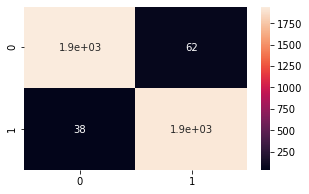

In [598]:
c_matrix = confusion_matrix(y_test, dct.predict(X_test))
plt.figure(figsize=(5,3))
sns.heatmap(c_matrix, annot=True)

# Random Forest

In [599]:
#Predicting the probabilities
rfc.predict_proba(X_train)

array([[0.   , 1.   ],
       [0.995, 0.005],
       [1.   , 0.   ],
       ...,
       [1.   , 0.   ],
       [0.97 , 0.03 ],
       [0.   , 1.   ]])

In [600]:
#Confusion matrix
confusion_matrix(y_test, rfc.predict(X_test))

array([[1986,   17],
       [   1, 1956]], dtype=int64)

<AxesSubplot:>

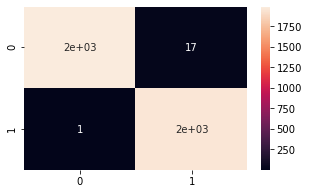

In [601]:
con_matrix = confusion_matrix(y_test, rfc.predict(X_test))
plt.figure(figsize=(5, 3))
sns.heatmap(con_matrix, annot=True)

# Gradient Boosting

In [602]:
#Predicting the probabilities
gbc.predict_proba(X_test)

array([[9.99081826e-01, 9.18173696e-04],
       [4.36687617e-04, 9.99563312e-01],
       [9.89215843e-01, 1.07841571e-02],
       ...,
       [9.97570274e-01, 2.42972569e-03],
       [9.99366079e-01, 6.33921333e-04],
       [2.86596744e-04, 9.99713403e-01]])

In [603]:
#Confusiin matrix
confusion_matrix(y_test, gbc.predict(X_test))

array([[1977,   26],
       [   4, 1953]], dtype=int64)

<AxesSubplot:>

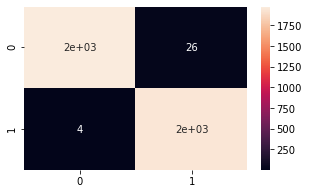

In [604]:
con_matrix = confusion_matrix(y_test, gbc.predict(X_test))
plt.figure(figsize=(5,3))
sns.heatmap(con_matrix, annot=True)

__Testing the decison Tree model on single input data__

In [605]:
new_input = {'AccountWeeks': 100,
             'ContractRenewal': 1,
             'DataPlan':1,
             'DataUsage':2.70,
             'CustServCalls':1,
             'DayMins':300.1,
             'DayCalls':150,
             'MonthlyCharge':89.0,
             'OverageFee':20.87,
             'RoamMins': 20.0}

In [606]:
new_input_df = pd.DataFrame([new_input])
new_input_df

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,100,1,1,2.7,1,300.1,150,89.0,20.87,20.0


In [607]:
def input_pred(input):
    prediction = dct.predict(new_input_df)[0]
    return prediction
input_pred(new_input)

0